## Simulacion

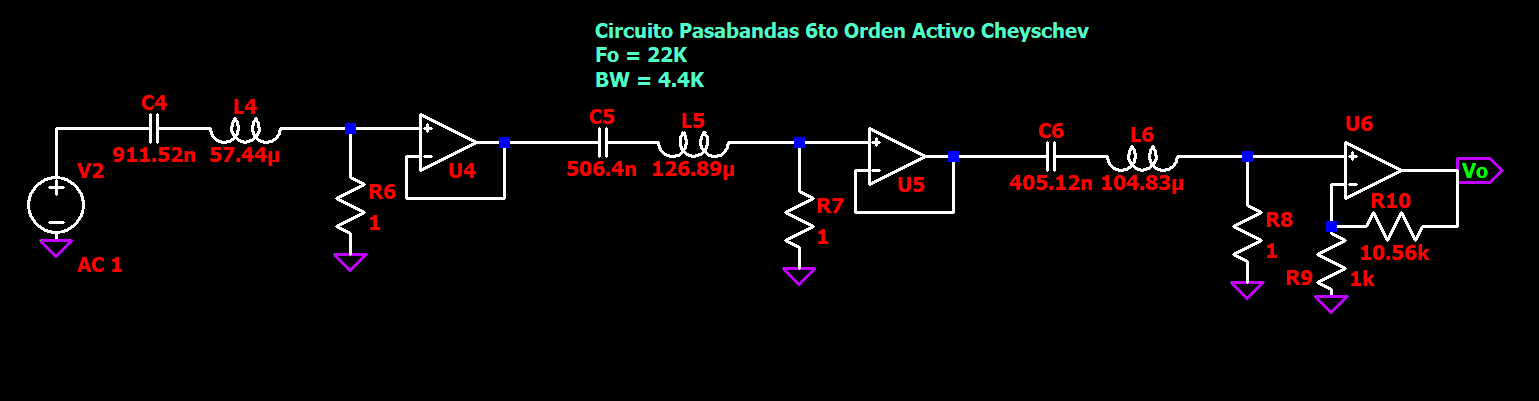


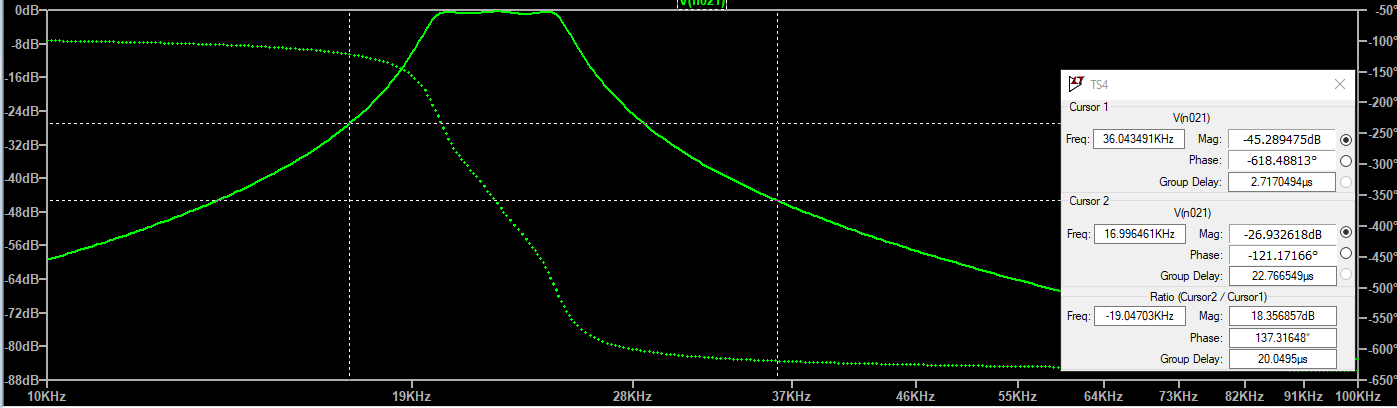

Como se puede observar la atenuacion en la primera frecuencia de stop es de 27dB y la atenuacion en la segunda frecuencia de stop es de 45.2dB por lo que cumplimos con los requerimientos en la banda de stop


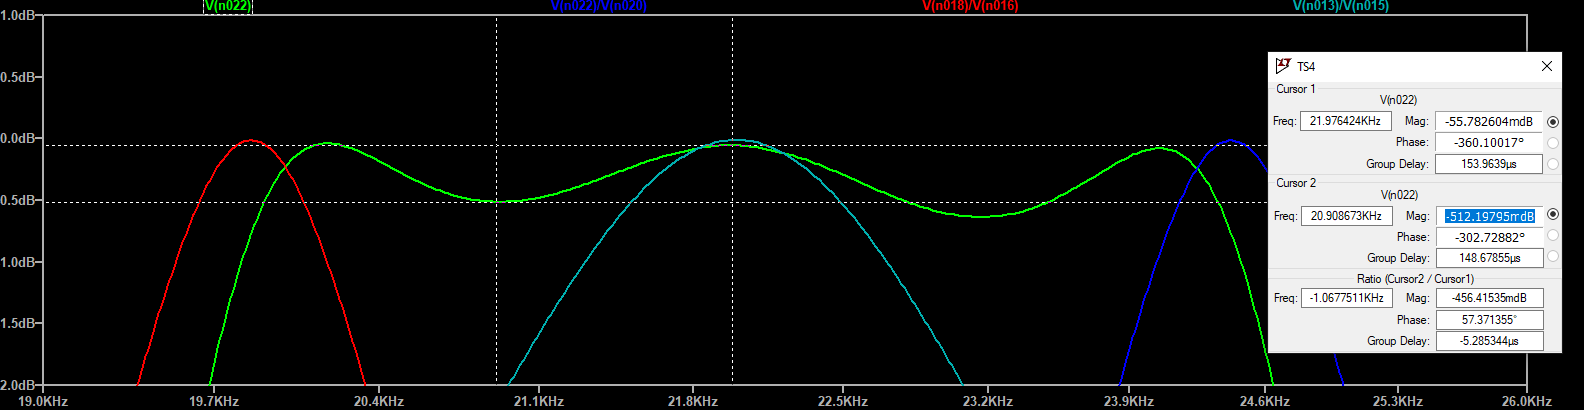

El ripple en banda es de -500mdB aproximadamente

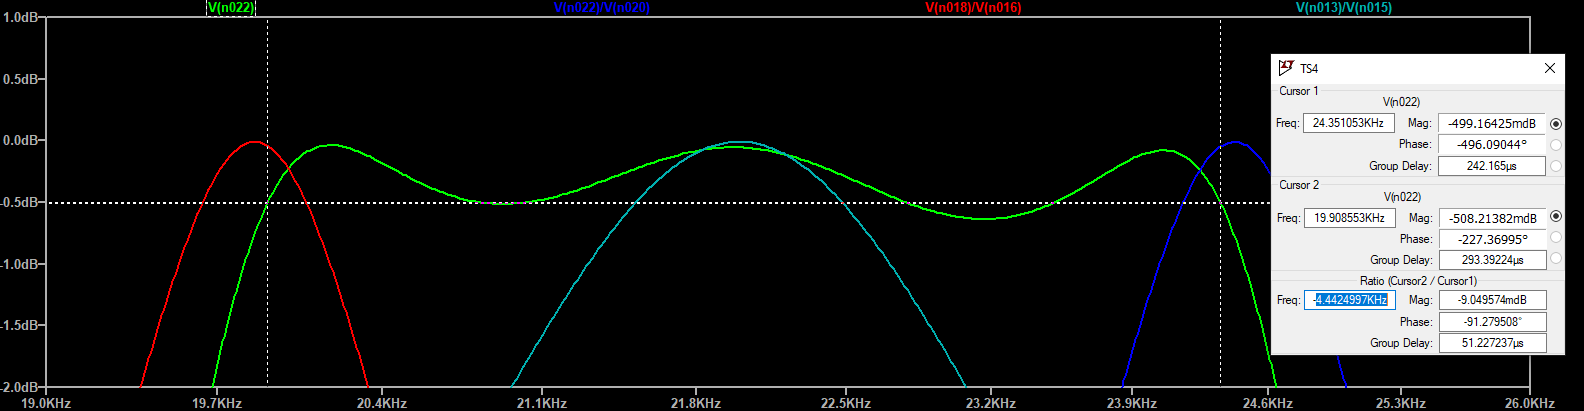

Ancho de banda 4.4KHz aproximadamente

### Circuito con bobinas activadas

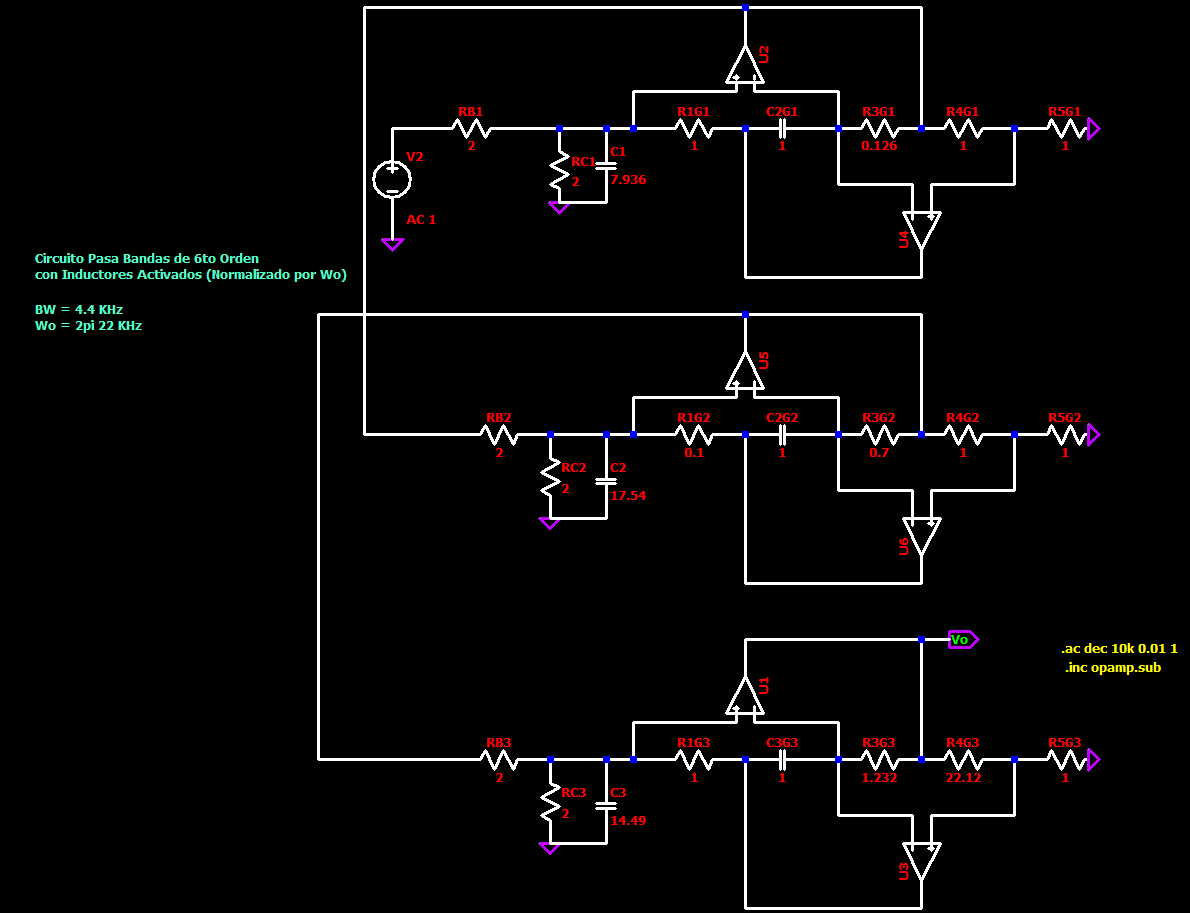

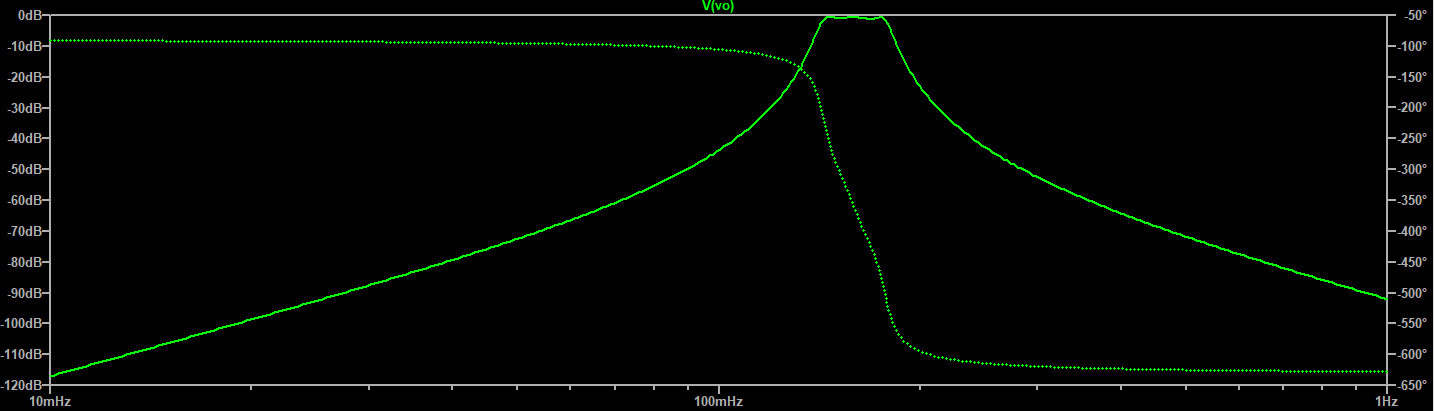




## Calculo Numerico

In [26]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Calibri'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})
plt.close('all')





print("\n---Plantilla PasaBandas---\n")
alpha_max = 0.5
alpha_min = 24

Q = 5
Wo = 2*np.pi*22e3



BW = Wo/Q


Wp2 = BW/2+np.sqrt(BW**2/4+Wo**2)
Wp1 = -BW/2+np.sqrt(BW**2/4+Wo**2)

Ws2 = 2*np.pi*36e3
Ws1 = 2*np.pi*17e3


print('Atenuacion maxima alpha_max = %0.2f dB'  %alpha_max)
print('Atenuacion minima alpha_min = %0.2f dB'  %alpha_min)
print('Ancho de Banda = %0.2f KHz'  %(BW/(2*np.pi)))
print('Frecuencia de paso Inferior = %0.2f KHz'  %(Wp1/(2*np.pi)))
print('Frecuencia de paso Superior = %0.2f KHz'  %(Wp2/(2*np.pi)))

print('Frecuencia de stop Inferior = %0.2f KHz'  %(Ws1/(2*np.pi)))
print('Frecuencia de stop Superior = %0.2f KHz'  %(Ws2/(2*np.pi)))


---Plantilla PasaBandas---

Atenuacion maxima alpha_max = 0.50 dB
Atenuacion minima alpha_min = 24.00 dB
Ancho de Banda = 4400.00 KHz
Frecuencia de paso Inferior = 19909.73 KHz
Frecuencia de paso Superior = 24309.73 KHz
Frecuencia de stop Inferior = 17000.00 KHz
Frecuencia de stop Superior = 36000.00 KHz


In [27]:
print("\n---Frecuencias Normalizadas---\n")

Omega_w = Wo

Wp2_n = Wp2/Omega_w
Wp1_n = Wp1/Omega_w

Ws2_n = Ws2/Omega_w
Ws1_n = Ws1/Omega_w

print('Frecuencia de paso Inferior = %0.3f rad/s'  %Wp1_n)
print('Frecuencia de paso Superior = %0.3f rad/s'  %Wp2_n)

print('Frecuencia de stop Inferior = %0.3f rad/s'  %Ws1_n)
print('Frecuencia de stop Superior = %0.3f rad/s'  %Ws2_n)


---Frecuencias Normalizadas---

Frecuencia de paso Inferior = 0.905 rad/s
Frecuencia de paso Superior = 1.105 rad/s
Frecuencia de stop Inferior = 0.773 rad/s
Frecuencia de stop Superior = 1.636 rad/s


In [28]:
print("\n---Plantilla Pasabajos Normalizada---\n")

Omega_p = 1
Omega_s2 = abs(Q * (Ws2_n**2-1)/Ws2_n)
Omega_s1 = abs(Q * (Ws1_n**2-1)/Ws1_n)

if Omega_s2>Omega_s1 :
    
    Omega_s = Omega_s1
else:
    Omega_s = Omega_s2              


print('Frecuencia de paso = %0.3f rad/s'  %Omega_p)

print('Frecuencia de stop = %0.3f rad/s'  %Omega_s)


---Plantilla Pasabajos Normalizada---

Frecuencia de paso = 1.000 rad/s
Frecuencia de stop = 2.607 rad/s


In [29]:
#Aproximacion de Chebyschev

N , wn= sig.cheb1ord(Omega_p, Omega_s, alpha_max, alpha_min,analog=True)

print("Filtro Chebyschev de Orden %d" %N)

z,p,k=sig.cheby1(N, alpha_max, wn,analog=True,output='zpk')

num_pb,den_pb = sig.zpk2tf(z, p, k)

T_PB = sig.TransferFunction(num_pb,den_pb)

Filtro Chebyschev de Orden 3


In [30]:
print('Transferencia')
tc2.pretty_print_SOS(sig.tf2sos(num_pb, den_pb))

Transferencia


<IPython.core.display.Math object>

Diagrama de Polos y Ceros


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

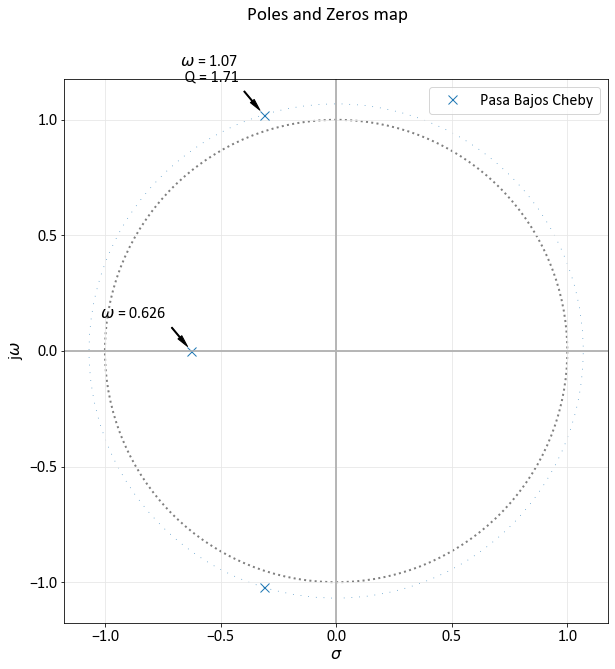

In [31]:
print('Diagrama de Polos y Ceros')
tc2.pzmap(T_PB, annotations = True, filter_description='Pasa Bajos Cheby', fig_id='none', axes_hdl='none')

Diagrama de Amplitud y Fase


(1,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

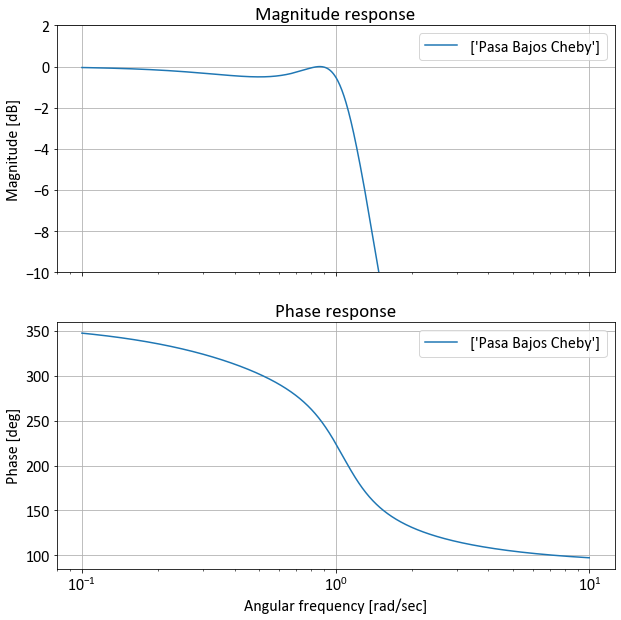

In [32]:
print('Diagrama de Amplitud y Fase')
tc2.bodePlot(T_PB, [-1,1], [2,-10],label = 'Pasa Bajos Cheby')

In [33]:
#Aproximacion de Chebyschev Pasabandas

num_bp_n,den_bp_n = sig.lp2bp(num_pb, den_pb,1,BW/Omega_w)
T_BP = sig.TransferFunction(num_bp_n,den_bp_n)

In [34]:
print('Transferencia')
tc2.pretty_print_SOS(sig.tf2sos(num_bp_n, den_bp_n))

Transferencia


<IPython.core.display.Math object>

Diagrama de Polos y Ceros


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

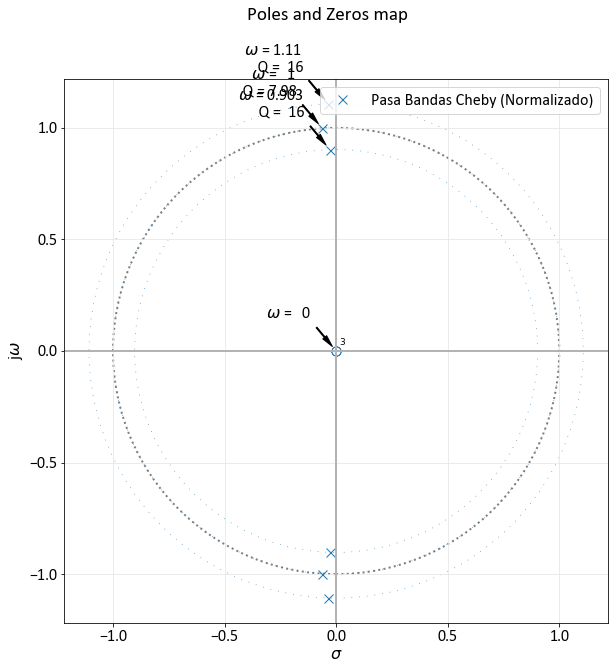

In [35]:
print('Diagrama de Polos y Ceros')
tc2.pzmap(T_BP, annotations = True, filter_description='Pasa Bandas Cheby (Normalizado)', fig_id='none', axes_hdl='none')

Diagrama de Amplitud y Fase


(1,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

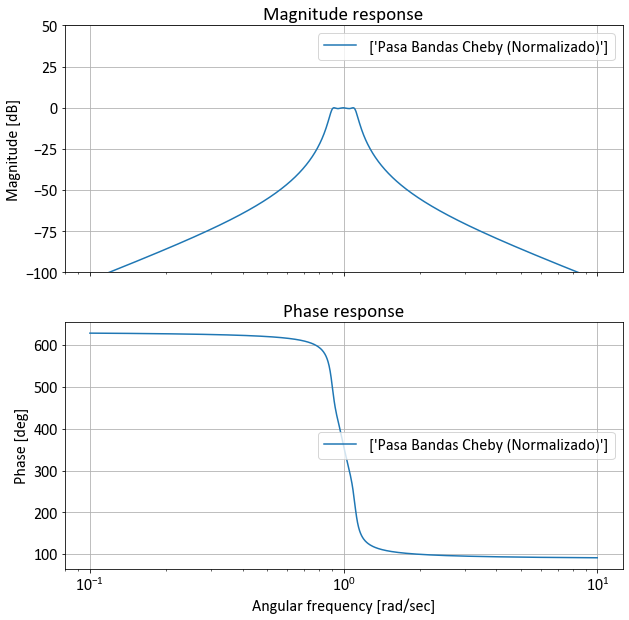

In [36]:
print('Diagrama de Amplitud y Fase')
tc2.bodePlot(T_BP, [-1,1], [50,-100],label = 'Pasa Bandas Cheby (Normalizado)')

In [37]:
#Aproximacion de Chebyschev Pasabandas Desnormalizado

num_bp,den_bp = sig.lp2bp(num_pb, den_pb,Wo,BW)

T_BP = sig.TransferFunction(num_bp,den_bp)

In [38]:
print('Transferencia')
tc2.pretty_print_SOS(sig.tf2sos(num_bp, den_bp))

Transferencia


<IPython.core.display.Math object>

Diagrama de Polos y Ceros


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

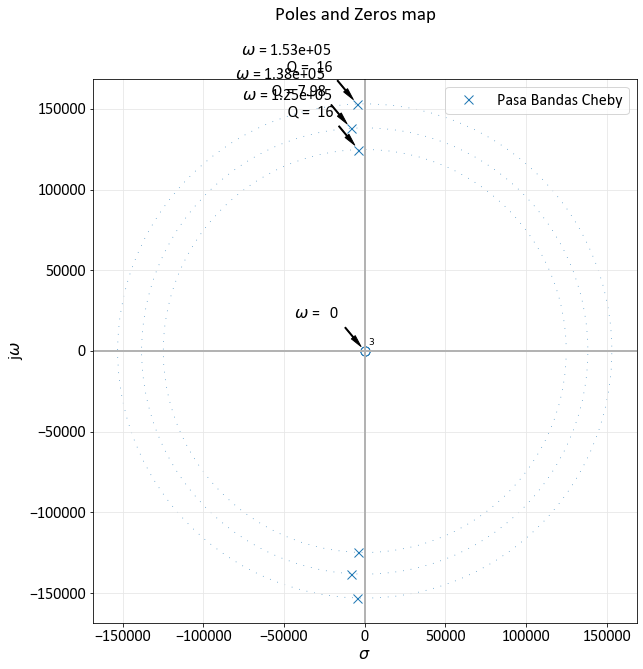

In [39]:
print('Diagrama de Polos y Ceros')
tc2.pzmap(T_BP, annotations = True, filter_description='Pasa Bandas Cheby', fig_id='none', axes_hdl='none')

Transferencia


(1,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

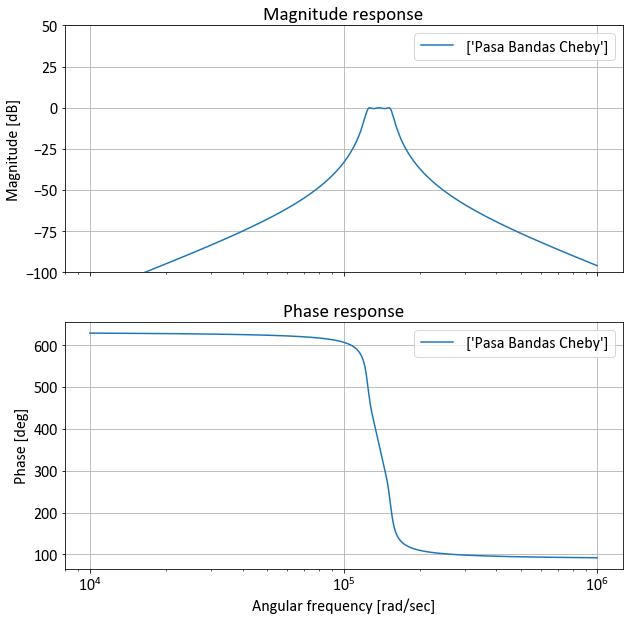

In [42]:
print('Transferencia')
tc2.bodePlot(T_BP, [4,6], [50,-100],label = 'Pasa Bandas Cheby',npoints=2000)

Transferencia Zoom


(1,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

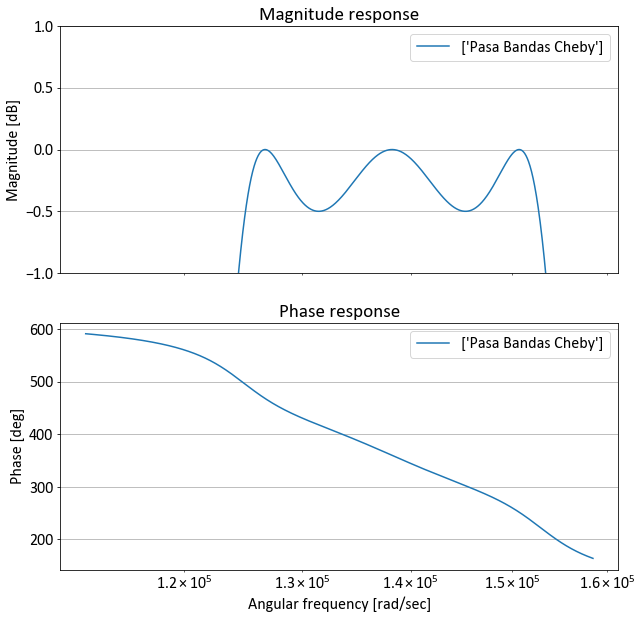

In [43]:
print('Transferencia Zoom')
tc2.bodePlot(T_BP, [5.05,5.2], [1,-1],label = 'Pasa Bandas Cheby',npoints=2000)